In [17]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l
import matplotlib as plt

In [18]:
def synthectic_data(w,b,num_examples):
    """生成 y = Xw + b + 噪声"""
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
feartures,labels=synthectic_data(true_w,true_b,1000)


In [19]:
feartures.shape

torch.Size([1000, 2])

In [20]:
print('feartures:',feartures[0],'\nlabel:',labels[0])


feartures: tensor([1.9167, 0.9748]) 
label: tensor([4.7224])


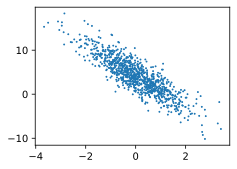

In [24]:
d2l.set_figsize()
d2l.plt.scatter(feartures[:,1].detach().numpy(),labels.detach().numpy(),1)


In [25]:
def data_iter(batch_size,feartures,labels):
    num_examples=len(feartures)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield feartures[batch_indices],labels[batch_indices]
batch_size=10

for X,y in data_iter(batch_size,feartures,labels):
    print(X,'\n',y)
    break


tensor([[-2.4702,  2.7730],
        [ 0.9138,  0.7234],
        [ 1.1531, -0.2143],
        [-1.1876, -0.5197],
        [ 2.5370,  1.0858],
        [-1.1572, -0.3364],
        [ 0.0421,  0.6988],
        [-0.6948,  0.0747],
        [ 0.4194,  1.1444],
        [ 0.7257, -0.2296]]) 
 tensor([[-10.1601],
        [  3.5793],
        [  7.2319],
        [  3.5940],
        [  5.5938],
        [  3.0336],
        [  1.9108],
        [  2.5570],
        [  1.1422],
        [  6.4400]])
